In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from datetime import date, datetime
import json
import numpy as np
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

from scipy.optimize import root_scalar
from scipy.interpolate import interp1d

In [2]:
base_url = 'https://markets.businessinsider.com'
page_url_template = ('https://markets.businessinsider.com/bonds/finder?p={page}&borrower=71&'
                     'maturity={maturity}&yield=&bondtype=2%2c3%2c4%2c16&coupon=&'
                     'currency=184&rating=&country=19')
terms = ["midterm", "shortterm"]
pages = [1, 2]

bond_data = []
today = datetime.today().strftime('%Y-%m-%d')

for term_type in terms:
    for page_num in pages:
        page_url = page_url_template.format(maturity=term_type, page=page_num)

        # Send a GET request to fetch the main page
        response = requests.get(page_url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all links to bond detail pages
        bond_links = []
        for a_tag in soup.find_all('a', href=True):
            if '/bonds/' in a_tag['href']:  # Only capture relevant links
                bond_links.append(base_url + a_tag['href'])

        # Loop through each bond link
        for link in bond_links:
            if "canada" in link:
                # Fetch the bond's detail page
                res = requests.get(link)
                soup = BeautifulSoup(res.text, 'html.parser')
         
                # Basic bond information
                info = soup.find_all('td', {'class': 'table__td text-right'})
                # Calculate number of days until maturity
                maturity = info[13].text.strip()
                maturity_date = datetime.strptime(maturity, "%m/%d/%Y")
                days_to_maturity = ((maturity_date - datetime.today()).days)
                
                # Basic bond information
                bond_info = {'Link': link,
                             'Date': today,
                             'ISIN': info[0].text.strip(),
                             'Issue Date': info[7].text.strip(),
                             'Coupon': info[8].text.strip(),
                             'Maturity Date': info[13].text.strip(),
                             'Months to Maturity': days_to_maturity,
                             'Next Coupon Payment': info[14].text.strip(), 
                             'Coupon Start Date': info[17].text.strip()}

                # Save the result
                bond_data.append(bond_info)

# Convert to a DataFrame for easier manipulation
bond_df = pd.DataFrame(bond_data)


In [3]:
bond_df

,Link,Date,ISIN,Issue Date,Coupon,Maturity Date,Months to Maturity,Next Coupon Payment,Coupon Start Date
0,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087N670,3/29/2022,2.250%,12/1/2029,1772,6/1/2025,6/1/2022
1,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087Q988,10/13/2023,4.000%,3/1/2029,1497,3/1/2025,3/1/2024
2,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087P329,8/8/2022,2.500%,12/1/2032,2868,6/1/2025,12/1/2022
3,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087R713,3/1/2024,3.500%,3/1/2034,3323,3/1/2025,9/1/2024
4,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087L443,10/5/2020,0.500%,12/1/2030,2137,6/1/2025,12/1/2020
5,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087N266,10/25/2021,1.500%,12/1/2031,2502,6/1/2025,12/1/2021
6,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087Q723,6/26/2023,3.250%,12/1/2033,3233,6/1/2025,12/1/2023
7,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087R895,4/8/2024,3.500%,9/1/2029,1681,3/1/2025,9/1/2024
8,https://markets.businessinsider.com/bonds/5_75...,2025-01-23,CA135087XG49,10/15/2001,5.750%,6/1/2033,3050,6/1/2025,12/1/2001
9,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087Q491,4/21/2023,3.250%,9/1/2028,1316,3/1/2025,9/1/2023


In [4]:
# Extract TKData
import json

for index, row in bond_df.iterrows():
    url = row["Link"]
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    script_tags = soup.find_all('script')
    
    for script_tag in script_tags:
        if script_tag.string and "detailChartViewmodel" in script_tag.string:
            script_content = script_tag.string

            start_index = script_content.find("{")
            end_index = script_content.find("};") + 1
            js_object = script_content[start_index:end_index]

            try:
                data = json.loads(js_object)
                tk_data = data.get("TKData")
                bond_df.at[index, "TK Data"] = tk_data

            except json.JSONDecodeError:
                print("Failed to parse the JavaScript object.")


                


In [5]:
# Extract Close Prices from historical graph
url_template = ('https://markets.businessinsider.com/Ajax/'
                'Chart_GetChartData?instrumentType=Bond&tkData={tkdata}&'
                'from=20250101&to=20250120')

for index, row in bond_df.iterrows():
    tk_data = row["TK Data"]
    url = url_template.format(tkdata=tk_data)
    
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data)
    df["Date"] = pd.to_datetime(df["Date"])

    filtered_df = df[(df['Date'] >= '2025-01-06 00:00:00')]
    
    # Only want data starting from 2025-01-06
    filtered_df.set_index('Date', inplace=True)
    daily_close_df = filtered_df.resample('D').last()[['Close']]
    for date, price in daily_close_df.iterrows():
        formatted_date = date.date()
        bond_df.at[index, formatted_date] = price['Close']
end_time = time.time()

# Save to csv
bond_df.to_csv("APM466 Bond Info.csv")



32.458674907684326


In [8]:
# Select 10 bonds such that maturity dates are equally spaced at March and September
bond_df = pd.read_csv("APM466 Bond Info.csv")
selected_bonds = bond_df.loc[bond_df['Maturity Date'].str[:1].isin(['3','9'])]

# Remove Weekends
selected_bonds = selected_bonds.drop(columns=['2025-01-11', '2025-01-12','2025-01-18','2025-01-19'], axis=1)
selected_bonds["Maturity Date"] = pd.to_datetime(selected_bonds["Maturity Date"])
selected_bonds = selected_bonds.sort_values(by="Maturity Date")
selected_bonds = selected_bonds[selected_bonds["Maturity Date"] <= pd.to_datetime("2030-12-31")]
# selected_bonds = selected_bonds.drop_duplicates(subset=['ISIN'])
selected_bonds.to_csv("APM466 Selected Bonds.csv")

In [9]:
# Convert clean price to dirty price
# Next coupon payment is 2025-03-01, last coupon payment is 2024-09-01
last_coupon = datetime.strptime("2024-09-01", "%Y-%m-%d")
price_columns = selected_bonds.columns[selected_bonds.columns.get_loc("2025-01-06"):]
for index, row in selected_bonds.iterrows():
    coupon = float(row["Coupon"].strip("%"))/2
    for col in price_columns:
        current_date = datetime.strptime(col, "%Y-%m-%d")
        n = (current_date - last_coupon).days
        days_between = (datetime(2025, 3, 1) - datetime(2024, 9, 1)).days
        accrued_interest = n/(days_between)

        selected_bonds.at[index, col] += (accrued_interest * coupon) 
        
        # Clean up dataframe and sort by maturity date
        selected_bonds["Maturity Date"] = pd.to_datetime(selected_bonds["Maturity Date"])
        selected_bonds = selected_bonds.sort_values(by="Maturity Date")

selected_bonds.to_csv("Selected Bonds Dirty Prices.csv")


In [10]:
selected_df = pd.read_csv("Selected Bonds Dirty Prices.csv")
selected_df

,Unnamed: 0.1,Unnamed: 0,Link,Date,ISIN,Issue Date,Coupon,Maturity Date,Months to Maturity,Next Coupon Payment,...,2025-01-07,2025-01-08,2025-01-09,2025-01-10,2025-01-13,2025-01-14,2025-01-15,2025-01-16,2025-01-17,2025-01-20
0,37,37,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087K528,10/11/2019,1.250%,2025-03-01,36,3/1/2025,...,100.171989,100.185442,100.178895,100.192348,100.192707,100.196160,100.239613,100.253066,100.276519,100.286878
1,21,21,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087K940,4/3/2020,0.500%,2025-09-01,220,3/1/2025,...,98.586796,98.578177,98.599558,98.550939,98.545083,98.546464,98.587845,98.659227,98.690608,98.724751
2,42,42,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087L518,10/9/2020,0.250%,2026-03-01,401,3/1/2025,...,97.068398,97.059088,97.089779,96.990470,97.002541,96.893232,96.993923,97.104613,97.155304,97.197376
3,30,30,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087L930,4/16/2021,1.000%,2026-09-01,585,3/1/2025,...,97.343591,97.356354,97.389116,97.221878,97.140166,97.082928,97.225691,97.408453,97.451215,97.499503
4,33,33,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087M847,10/15/2021,1.250%,2027-03-01,766,3/1/2025,...,97.031989,97.025442,97.078895,96.842348,96.742707,96.656160,96.829613,97.073066,97.116519,97.176878
5,34,34,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087N837,5/13/2022,2.750%,2027-09-01,950,3/1/2025,...,100.532376,100.519972,100.567569,100.265166,100.147956,100.045552,100.233149,100.540746,100.578343,100.681133
6,16,16,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087P576,10/21/2022,3.500%,2028-03-01,1132,3/1/2025,...,103.057569,102.947238,102.976906,102.786575,102.555580,102.325249,102.554917,102.904586,102.984254,103.073260
7,9,9,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087Q491,4/21/2023,3.250%,2028-09-01,1316,3/1/2025,...,102.289171,102.148149,102.107127,101.966105,101.693039,101.402017,101.640994,102.149972,102.258950,102.375884
8,1,1,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087Q988,10/13/2023,4.000%,2029-03-01,1497,3/1/2025,...,105.424365,105.325414,105.306464,104.977514,104.770663,104.481713,104.742762,105.313812,105.424862,105.578011
9,7,7,https://markets.businessinsider.com/bonds/cana...,2025-01-23,CA135087R895,4/8/2024,3.500%,2029-09-01,1681,3/1/2025,...,103.377569,103.287238,103.236906,102.856575,102.575580,102.305249,102.584917,103.174586,103.304254,103.493260


In [11]:
# Calculate Yield Curve for each day

# Want to discount to each day, so need to define a function that can 
# accomodate cash flows occuring at differing intervals


def calculate_ytm(bond_price, 
                  coupon_rate,
                  maturity_date,
                  obs_date,
                  face_value=100):
    
    next_coupon = datetime(2025, 3, 1)
    days_until_next_coupon = (next_coupon - obs_date).days
    
    coupons = []
    dates = []
    
    current_date = next_coupon
    while current_date <= maturity_date:
        dates.append(current_date)
        coupons.append(coupon_rate/2)
        current_date += relativedelta(months=6)
    
    coupons[-1] += face_value
    
    times = np.array([(date - obs_date).days / 365 for date in dates])
    
    
    def present_value(ytm):
        return sum(c * np.exp(-ytm * t) for c, t in zip(coupons, times)) - bond_price
    result = root_scalar(present_value, bracket = [0, 1], method="brentq")
    return result.root
    

In [12]:
selected_df = pd.read_csv("Selected Bonds Dirty Prices.csv")
next_coupon = datetime.strptime("2025-03-01", "%Y-%m-%d")
yields = {}
for index, row in selected_df.iterrows():
    maturity = datetime.strptime(row["Maturity Date"], "%Y-%m-%d")
    coupon = float(row["Coupon"].strip("%"))
    price_columns = selected_df.columns[selected_df.columns.get_loc("2025-01-06"):]
  
    for col in price_columns:
        bond_price = float(selected_df.at[index, col])
        obs_date = datetime.strptime(col, "%Y-%m-%d")
        
        daily_ytm = calculate_ytm(bond_price, coupon, maturity, obs_date)

        if col in yields:
            yields[col].append(daily_ytm * 100)
        else:
            yields[col] = [daily_ytm * 100]

            

In [13]:
# Define x-axis for graphs
dates = selected_df["Maturity Date"]
dates = pd.to_datetime(dates, format="%Y-%m-%d")
x_axis = []
for date in dates:
    num_days = (date - datetime.today()).days
    x_axis.append(num_days)
ticks = list(range(0, max(x_axis) + 1, 365))
print(x_axis)


[25, 209, 390, 574, 755, 939, 1121, 1305, 1486, 1670, 1851]


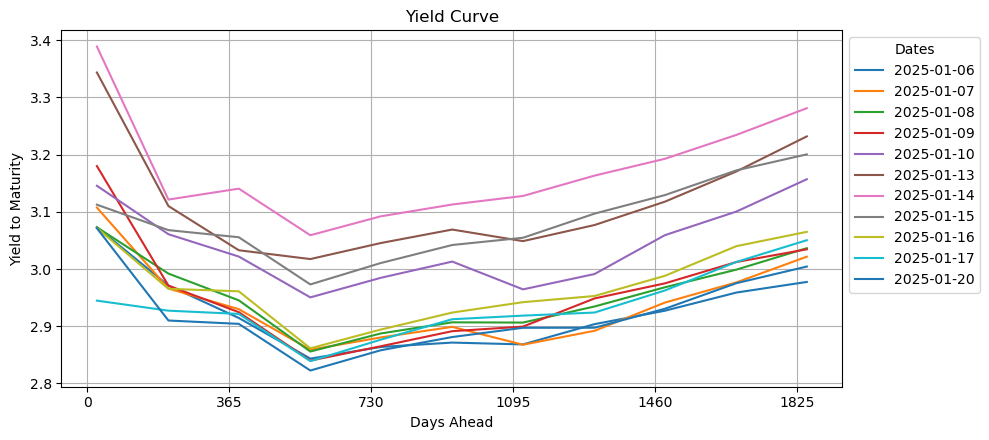

In [14]:
# Graph
yields_df = pd.DataFrame(yields)
yields_df.to_csv("yields.csv")
    
plt.figure(figsize=(10, 4.5))
for column in yields_df.columns: 
    plt.plot(x_axis, yields_df[column], label=column)
    
plt.xticks(ticks, labels=ticks)

# Add labels and title
plt.title("Yield Curve")
plt.xlabel("Days Ahead")
plt.ylabel("Yield to Maturity")
plt.legend(title="Dates", loc="upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.savefig('YTM Curve.png')

In [15]:
yields_df

,2025-01-06,2025-01-07,2025-01-08,2025-01-09,2025-01-10,2025-01-13,2025-01-14,2025-01-15,2025-01-16,2025-01-17,2025-01-20
0,3.073171,3.107415,3.072912,3.179936,3.145509,3.343503,3.388842,3.112463,3.071876,2.944763,3.071359
1,2.971128,2.965874,2.992014,2.971020,3.060828,3.110068,3.121389,3.067995,2.965375,2.927224,2.910027
2,2.914457,2.929829,2.945276,2.924581,3.021800,3.032796,3.140490,3.055540,2.961063,2.921565,2.904158
3,2.843436,2.859039,2.855804,2.839948,2.950444,3.017415,3.059033,2.973082,2.861454,2.839016,2.822623
4,2.863782,2.880437,2.887372,2.864999,2.984601,3.045386,3.092103,3.010435,2.894175,2.876524,2.858002
5,2.871460,2.898891,2.906856,2.891375,3.013027,3.068998,3.112767,3.042000,2.923910,2.912260,2.881141
6,2.868247,2.867735,2.906424,2.899401,2.964452,3.048761,3.127690,3.054640,2.942070,2.918544,2.897310
7,2.903668,2.892045,2.934534,2.948586,2.991263,3.076882,3.163245,3.096818,2.952865,2.923957,2.897417
8,2.927133,2.941387,2.968103,2.974954,3.059200,3.117697,3.192656,3.129214,2.988152,2.962515,2.930584
9,2.958903,2.976659,2.998968,3.012273,3.100483,3.170539,3.234445,3.172479,3.039998,3.012463,2.975287


In [16]:
# Spot Rates - Bootstrapping
def bootstrap_yield_curve(bonds):
    spot_rates = np.zeros(len(bonds))  # Initialize spot rates array

    for i, (price, coupon_rate, maturity_date, t, current_date) in enumerate(bonds):
        # Generate cash flows: coupon payments + face value
        num_payments = ((maturity_date.year - datetime(2025, 3, 1).year) * 2) + ((maturity_date.month - datetime(2025, 3, 1).month) // 6) + 1
        cash_flows = np.array([coupon_rate] * (num_payments - 1) + [100 + coupon_rate])
        time_periods = [t]
        coupon_date = datetime(2025, 9, 1)
        while len(time_periods) < num_payments:
            # print(f"initial coupon is {coupon_date}")
            num_days = (coupon_date - current_date).days
            # print(f"num days bw coupon and 2025/03/01 is {num_days}")
            time_periods.append(num_days)
            coupon_date += relativedelta(months=6)
#             print(len(time_periods))
#             print(num_days)
#             print(f"adjusted coupon date is {coupon_date}")
#         print(time_periods)

        # Discount earlier cash flows using already computed spot rates
        discounted_cash_flows = 0
        for j in range(len(cash_flows) - 1):  # Only consider known spot rates

            discounted_cash_flows += cash_flows[j] * np.exp(-1 * spot_rates[j] * time_periods[j] / 365)

        # Calculate the spot rate for the current bond
        residual = price - discounted_cash_flows
        if residual <= 0:
            print(f"Warning: Residual for bond with maturity {maturity} is too low. Adjusting spot rate calculation")
            spot_rate = spot_rate[i-1] # Use previous spot rate as an approximation
        else:
            spot_rate = -1 * np.log(residual / cash_flows[-1]) * (1 / (time_periods[-1] / 365))

        # Store the computed spot rate
        spot_rates[i] = spot_rate

    return spot_rates
    

In [17]:
price_columns = selected_df.columns[selected_df.columns.get_loc("2025-01-06"):]
spot_rates = {}
for col in price_columns:
    bonds = []
    current_date = datetime.strptime(col, "%Y-%m-%d")
    for index, row in selected_df.iterrows():
        maturity = datetime.strptime(row["Maturity Date"], "%Y-%m-%d")
        t = (datetime(2025, 3, 1) - datetime.strptime(col, "%Y-%m-%d")).days
        coupon_rate = float(row["Coupon"].strip("%"))/2
        bond_price = float(selected_df.at[index, col])
        bonds.append((bond_price, coupon_rate, maturity, t, current_date)) 
    daily_spot_rate = bootstrap_yield_curve(bonds) 
    spot_rates[col] = daily_spot_rate


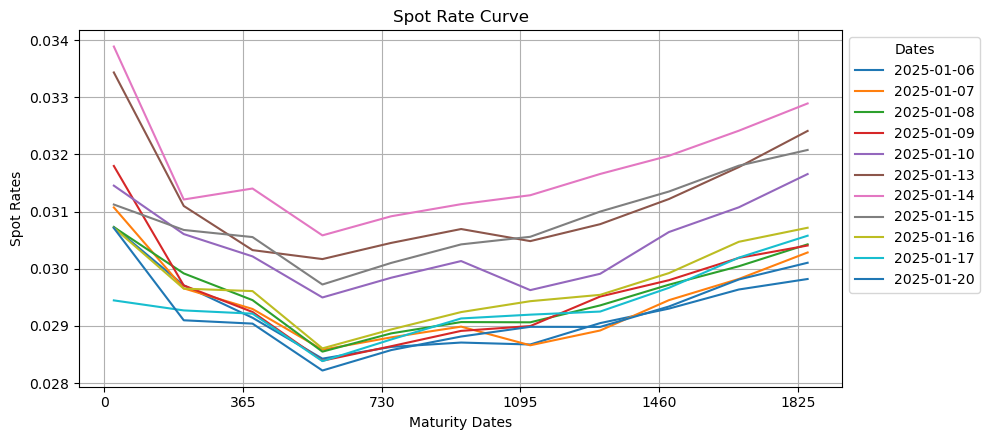

In [18]:
# Graph
spot_rates_df = pd.DataFrame(spot_rates)

plt.figure(figsize=(10, 4.5))

for column in yields_df.columns: 
    plt.plot(x_axis, spot_rates_df[column], label=column)

plt.xticks(ticks, labels=ticks)

# Add labels and title
plt.title("Spot Rate Curve")
plt.xlabel("Maturity Dates")
plt.ylabel("Spot Rates")
plt.legend(title="Dates", loc="upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.savefig('Spot Rate Curve.png')

In [19]:
spot_rates_df

,2025-01-06,2025-01-07,2025-01-08,2025-01-09,2025-01-10,2025-01-13,2025-01-14,2025-01-15,2025-01-16,2025-01-17,2025-01-20
0,0.030732,0.031074,0.030729,0.031799,0.031455,0.033435,0.033888,0.031125,0.030719,0.029448,0.030714
1,0.029711,0.029658,0.029920,0.029709,0.030608,0.031099,0.031213,0.030680,0.029653,0.029272,0.029100
2,0.029144,0.029298,0.029452,0.029245,0.030218,0.030327,0.031405,0.030555,0.029610,0.029216,0.029041
3,0.028428,0.028585,0.028551,0.028392,0.029499,0.030170,0.030585,0.029726,0.028608,0.028385,0.028221
4,0.028634,0.028801,0.028870,0.028646,0.029844,0.030453,0.030919,0.030103,0.028939,0.028764,0.028578
5,0.028710,0.028989,0.029069,0.028914,0.030136,0.030696,0.031131,0.030427,0.029243,0.029132,0.028816
6,0.028676,0.028662,0.029064,0.028998,0.029627,0.030484,0.031287,0.030560,0.029434,0.029198,0.028985
7,0.029050,0.028921,0.029360,0.029515,0.029913,0.030781,0.031659,0.031001,0.029545,0.029252,0.028984
8,0.029304,0.029452,0.029722,0.029801,0.030643,0.031221,0.031978,0.031352,0.029925,0.029668,0.029341
9,0.029638,0.029823,0.030045,0.030191,0.031076,0.031779,0.032416,0.031804,0.030473,0.030195,0.029814


In [20]:
# Forward Rates
# Each curve graphs four points: F1-2, F1-3, F1-4, F1-5
forward_rates = {}
price_columns = selected_df.columns[selected_df.columns.get_loc("2025-01-06"):]
for col in price_columns:
    day_forward_rates = []
    interp_func = interp1d(x_axis, spot_rates_df[col], kind='linear')
    for i in [2, 3, 4, 5]:
        s1 = interp_func(i * 365)
        s2 = interp_func(365)
        f = ((i * s1) - s2) / (i - 1)
        day_forward_rates.append(f)
    forward_rates[col] = day_forward_rates
        
    

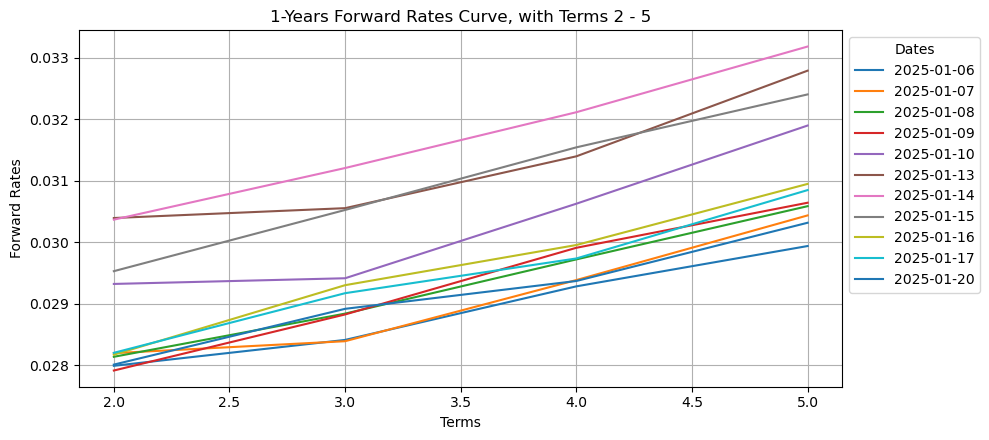

In [21]:
# Graph
forward_rates_df = pd.DataFrame(forward_rates)

plt.figure(figsize=(10, 4.5))

x = [2, 3, 4, 5]
for column in forward_rates_df.columns: 
    plt.plot(x, forward_rates_df[column], label=column)

# Add labels and title
plt.title("1-Years Forward Rates Curve, with Terms 2 - 5")
plt.xlabel("Terms")
plt.ylabel("Forward Rates")
plt.legend(title="Dates", loc="upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.savefig("Forward Rates.png")

In [22]:
# Interpolating yield curve
interpolated_rates = {}
for col in yields_df.columns:
    rates = []
    interp_func = interp1d(x_axis, yields_df[col], kind='linear')
    for i in [1, 2, 3, 4, 5]:
        r = interp_func(i * 365)
        rates.append(r)
    interpolated_rates[col] = rates
interpolated_df = pd.DataFrame(interpolated_rates)
interpolated_df1 = interpolated_df.drop(columns=['2025-01-20'])
interpolated_df2 = interpolated_df.drop(columns=['2025-01-06'])
interpolated_df

,2025-01-06,2025-01-07,2025-01-08,2025-01-09,2025-01-10,2025-01-13,2025-01-14,2025-01-15,2025-01-16,2025-01-17,2025-01-20
0,2.9222841810383215,2.934807365364503,2.951731155577164,2.930995488880714,3.027190898208883,3.0434693485382462,3.1378514660370374,3.0572599345973983,2.9616587460419233,2.9223466616535423,2.9049687621584375
1,2.86097211284671,2.87748118798545,2.883011517326942,2.8615387039296043,2.9798833468438675,3.0415223634160884,3.0875356815916706,3.0052758086525784,2.889655758652349,2.87134367310697,2.853115752312706
2,2.8687063091022607,2.8721858792602464,2.906486077794551,2.8982542970503125,2.971391074857833,3.0516522561921704,3.1255581875639713,3.0528339995085445,2.9394758954545233,2.9176459971418316,2.894999939600189
3,2.923762074458036,2.9342989613780173,2.9632811628826343,2.971166346139219,3.049441386929848,3.1118340913795786,3.188430891600606,3.124560529507902,2.983082989408013,2.9569763600700965,2.9258199240624165
4,2.9747732727580014,3.015112371977896,3.0310218628861256,3.0312559282749856,3.148806436641097,3.223017142947713,3.2743639150246358,3.196387029433254,3.061401171710078,3.0449197123750125,3.000176179854548


In [23]:
returns = (interpolated_df2.values / interpolated_df1.values)
returns = pd.DataFrame(returns)
for index, row in returns.iterrows():
    for i in range(len(row)):
        row[i] = np.log(row[i])
        
returns = returns.transpose()

In [24]:
cov_matrix = returns.cov()
cov_matrix

,0,1,2,3,4
0,0.000445,0.000448,0.000415,0.000436,0.000454
1,0.000448,0.000525,0.000465,0.000482,0.000535
2,0.000415,0.000465,0.000461,0.000473,0.000486
3,0.000436,0.000482,0.000473,0.000504,0.000515
4,0.000454,0.000535,0.000486,0.000515,0.000570


In [25]:
# Eigenvalues and Eigenvectors
eigen = np.linalg.eig(cov_matrix)
eigenvalues = eigen[0]
print(eigenvalues[0]/sum(eigenvalues))
eigen

0.9547203691864794


(array([2.39232556e-03, 3.39338394e-06, 1.39717493e-05, 5.24339248e-05,
        4.36620368e-05]),
 array([[-0.41073115,  0.15276461, -0.1770882 ,  0.87292903,  0.1208204 ],
        [-0.46015613, -0.48075758,  0.4657366 , -0.11698731,  0.57142967],
        [-0.43055645,  0.41923309,  0.61105904, -0.08157516, -0.5087407 ],
        [-0.45138231, -0.57226689, -0.39583515, -0.11693084, -0.54626581],
        [-0.48003272,  0.49222896, -0.4707978 , -0.45164316,  0.31882148]]))

In [26]:
# Forward curve was interpolated already
# Take log of returns
forward_rates_df1 = forward_rates_df.drop(columns=['2025-01-20'])
forward_rates_df2 = forward_rates_df.drop(columns=['2025-01-06'])

fw_returns = (forward_rates_df2.values / forward_rates_df1.values)
fw_returns = pd.DataFrame(fw_returns)
for index, row in fw_returns.iterrows():
    for i in range(len(row)):
        row[i] = np.log(row[i])
        
fw_returns = fw_returns.transpose()

In [27]:
# Covariance
fw_cov_matrix = fw_returns.cov()
fw_cov_matrix

,0,1,2,3
0,0.000766,0.000546,0.000557,0.000667
1,0.000546,0.000531,0.000525,0.000526
2,0.000557,0.000525,0.000564,0.000564
3,0.000667,0.000526,0.000564,0.000644


In [29]:
# Eigenvalues and Eigenvectors
np.linalg.eig(fw_cov_matrix)
eigenvalues_f = np.linalg.eig(fw_cov_matrix)[0]
eigenvalues_f[0]/sum(eigenvalues_f)

0.9301329761864552